## Bar Chart using Seaborn

A basic bar chart of frequencies can be created through the use of seaborn's countplot function.
We will see the usage of a few of the arguments of the countplot() function.

## Example 1. Create a vertical bar chart using Seaborn, with default colors

In [3]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
print()
print(pokemon.dtypes)

(807, 14)

id                   int64
species             object
generation_id        int64
height             float64
weight             float64
base_experience      int64
type_1              object
type_2              object
hp                   int64
attack               int64
defense              int64
speed                int64
special-attack       int64
special-defense      int64
dtype: object


In [5]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


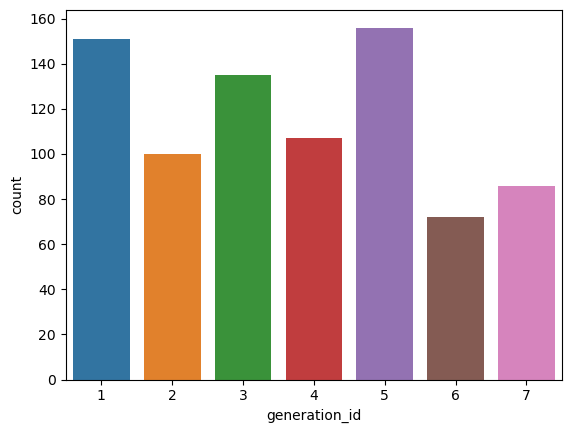

In [6]:

# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

In the example above, all the bars have a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. You can choose to have a uniform color across all bars, by using the color argument, as shown in the example below:


## Example 2. Create a vertical bar chart using Seaborn, with a uniform single color

In [7]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples.
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

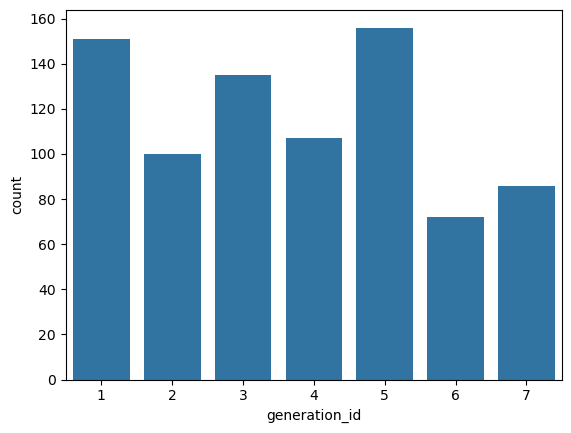

In [8]:
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color.
# Choose the first tuple of RGB colors

base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

There is a lot more you can do with both Seaborn and Matplotlib bar charts. The remaining examples will experiment with seaborn's countplot() function.

For nominal-type data, one common operation is to sort the data in terms of frequency. In the examples shown above, you can even order the bars as desirable. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

This can be done by using the order argument of the countplot() function.

## Example 4. Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

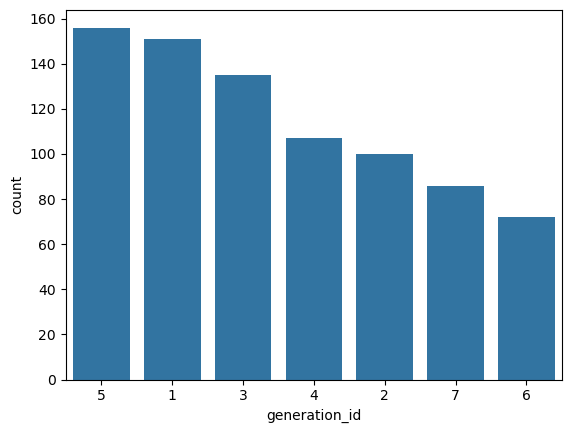

In [9]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

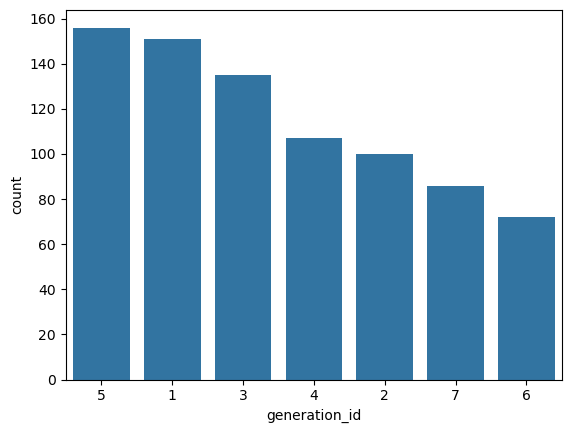

In [10]:
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
# Get the indexes of the Series
gen_order = pokemon['generation_id'].value_counts().index
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables.
The best thing for us to do in this case is to convert the column into an ordered categorical data type.
Should you find that you need to sort an ordered categorical type in a different order, you can always temporarily override the data type by setting the "order" parameter as above.

The category labels in the examples above are very small. In case, the category labels have large names, you can make use of the matplotlib.pyplot.xticks(rotation=90) function, which will rotate the category labels (not axes) counter-clockwise 90 degrees.



## Example 5. Rotate the category labels (not axes)

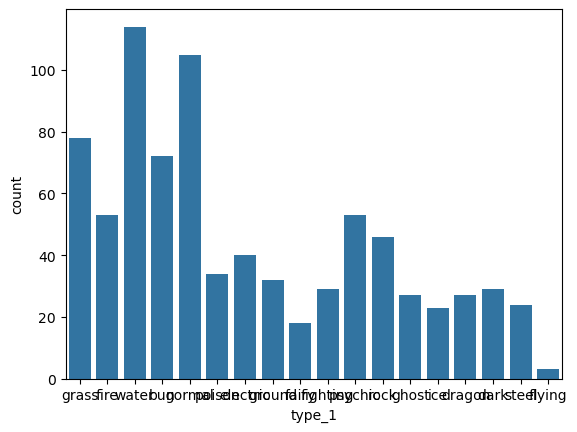

In [11]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

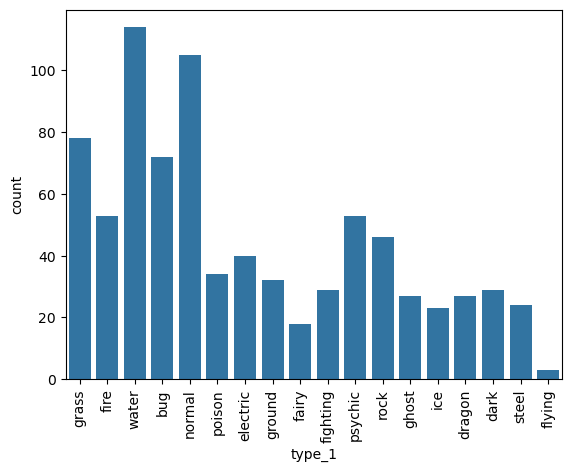

In [12]:

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)
sb.countplot(data=pokemon, x='type_1', color=base_color);

Even after using the matplotlib.pyplot.xticks(rotation=90) function, if the category labels do not fit well, you can rotate the axes.

## Example 6. Rotate the axes clockwise

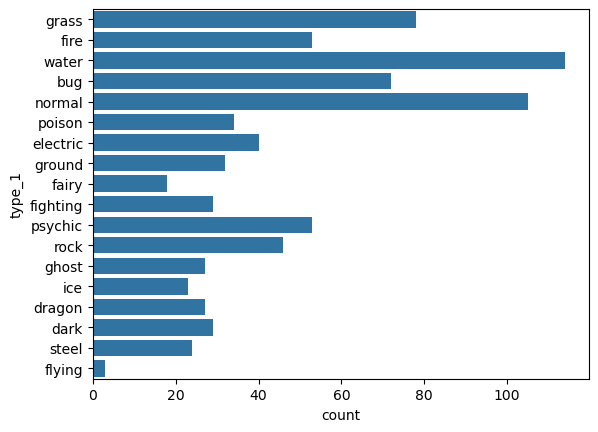

In [13]:
# Plot the Pokemon type on a Horizontal bar chart, give y axis for colum
sb.countplot(data=pokemon, y='type_1', color=base_color);

## Bar Chart using the Matplotlib

You can even create a similar bar chart using the Matplotlib, instead of Seaborn. We will use the matplotlib.pyplot.bar() function to plot the chart. The syntax is:

    matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)



In the example below, we will use Series.value_counts() to extract a Series from the given DataFrame object.

## Example 3. Create a vertical bar chart using Matplotlib, with a uniform single color

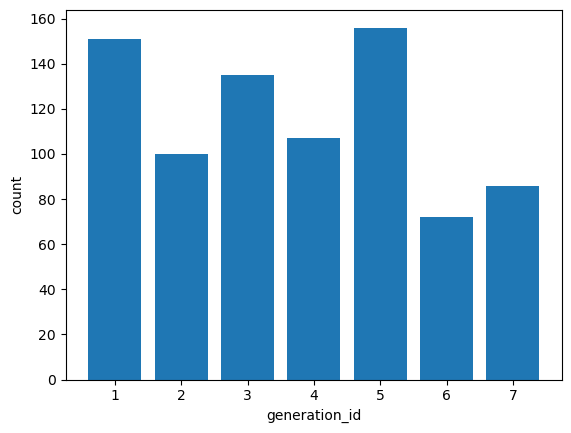

In [14]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()